In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris

In [4]:
data = load_iris()

In [5]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
## independent features
X=pd.DataFrame(data['data'],columns=['sepal length','sepal width','petal length','petal width'])

In [8]:
## dependent features
y=data['target']

In [9]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

In [13]:
## apply decision tree classifier
from sklearn.tree import DecisionTreeClassifier
treeClassifier = DecisionTreeClassifier(max_depth=2)

In [14]:
treeClassifier.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.159\nsamples = 46\nvalue = [0, 4, 42]')]

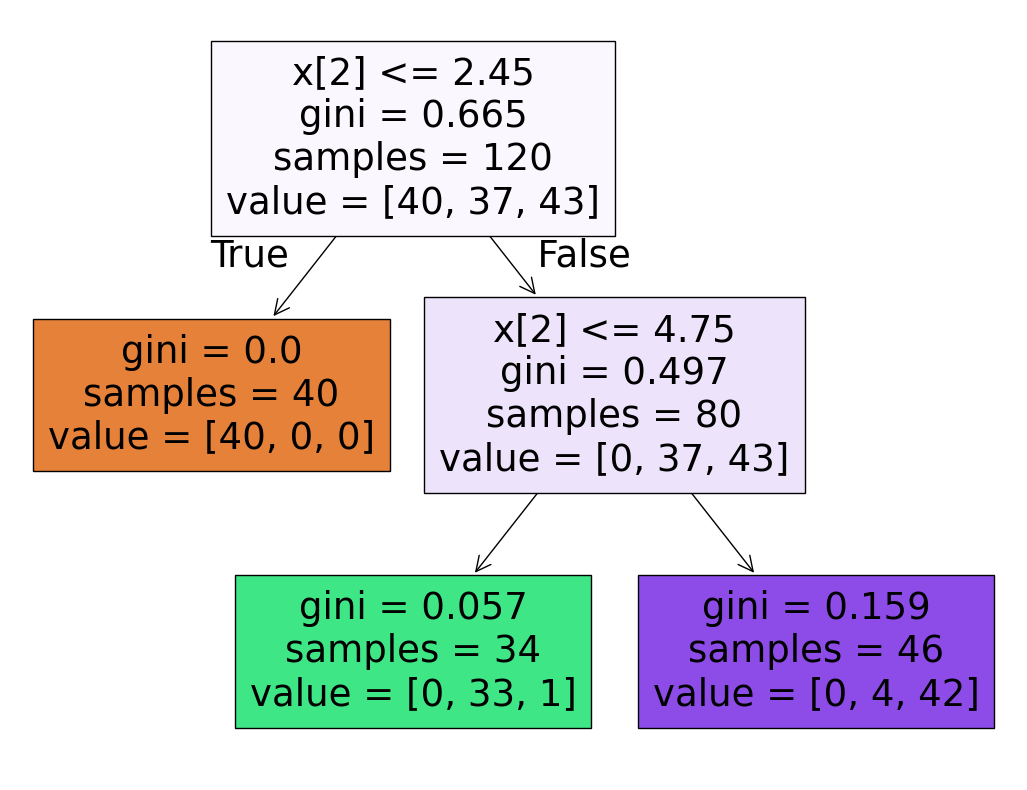

In [19]:
## visualise the decision tree
from sklearn import tree
plt.figure(figsize=(13,10))
tree.plot_tree(treeClassifier,filled=True)

In [20]:
y_pred = treeClassifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [22]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
cr = classification_report(y_test,y_pred)
print(cr)

[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



## preprunning and hyperperameter tunning 

In [23]:
params = {
    'criterion' : ['gini','entropy','log_loss'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['auto','sqrt','log2']
}

In [24]:
params

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
treeModel = DecisionTreeClassifier()

In [27]:
grid = GridSearchCV(estimator=treeModel,param_grid=params,cv=5,scoring='accuracy')

In [28]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [29]:
grid.best_estimator_

,criterion,'gini'
,splitter,'random'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [31]:
grid.best_score_

np.float64(0.9583333333333333)

In [32]:
y_pred = grid.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9666666666666667
[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

